# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string

pd.options.display.max_colwidth = 500

In [2]:
nltk.download('stopwords')
nltk.download('words')
nltk.download('brown')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aloysius/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/aloysius/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package brown to /home/aloysius/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /home/aloysius/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/aloysius/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/aloysius/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
shopee_train_df = pd.read_csv("./data/train.csv")
add_train_df = pd.read_csv("./data/shopee_reviews.csv")
test_df = pd.read_csv("./data/test.csv")

/home/aloysius/.miniconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
add_train_df = add_train_df[add_train_df['label'] != 'label']
add_train_df = add_train_df.astype({"label": "int32"})
add_train_df = add_train_df.rename(columns = {"label": "rating", "text": "review"})
add_train_df

,rating,review
0,5,Looks ok. Not like so durable. Will hv to use a while to recommend others of its worth.
1,5,"Tried, the current can be very powerful depending on the setting, i don't dare to go higher but if go higher sure muscle will become sore and can see the effect faster."
2,5,"Item received after a week. Looks smaller than expected, can’t wait to try!"
3,5,Thanks!!! Works as describe no complaints. Not really expecting any life changing results but thanks!
4,5,Fast delivery considering it’s from overseas and only tried once. Not sure about the results yet.
...,...,...
1502570,5,Tried and it fit nicely will buy \nFast and good will buy again.
1502571,5,It's a fantastic product. Very reasonable price and very good quality. The seller replies to all queries and is very professional. The pacaging was done very nicely and delivered within 10days of purchase.
1502572,5,"Nice pair of shoes for a gd price. Note the cutting is a bit smaller than usual, I bought size 43, but is a bit tight compared to my usual size 43. So maybe recommended to buy 0.5 size bigger."
1502573,1,Leather? Rubbish....moulded plastic. What a a fake...how can shoppee allow such products to be sold.


In [5]:
tdf = pd.concat([shopee_train_df.drop('review_id', axis = 1), add_train_df])
train_df = pd.DataFrame(columns = tdf.columns.values)
for _, group in tdf.groupby("rating"):
    group = group.sample(n = 30000)
    train_df = pd.concat([train_df, group])
train_df

,review,rating
26226,Not the same as picture. Tiny.,1
230134,"The packaging is bad. One side of the cover came off and tape was used to hold the box together. Unfortunately this review does not allow picture upload. For a health product especially drinking water, I have no faith to use it at all.",1
306025,"The strap is too short for reusable mask. Seller later clarify that is only applicable for disposable mask, with long line. Refund rejected. I demonstrated that is too short. It only reach half way behind my head. Only way to pull thru is to bring it down all the way to my neck.",1
19553,😑,1
691301,"the design is different but is okay, still looks good. hehe 👍👍",1
...,...,...
1329887,Received the item in good condition. Tried and working well. Loud and have few tones to choose,5
302802,Stickers were sticky but the quality of the pictures were not that clear and the material is the glossy kind,5
366383,"Prompt delivery and items were well packed. Haven’t tried using the stars to confirm if they do glow well in the dark, but they look pretty good for now.",5
280838,Thumb up to delivery service. Have tried the product. It works well. The only concern is without the whale and it is quite heavy to carry around the room.,5


In [6]:
test_df

,review_id,review
0,1,"Great danger, cool, motif and cantik2 jg models. Delivery cepet. Tp packing less okay krn only wear clear plastic nerawang klihtan contents jd"
1,2,One of the shades don't fit well
2,3,Very comfortable
3,4,Fast delivery. Product expiry is on Dec 2022. Product wrap properly. No damage on the item.
4,5,it's sooooo cute! i like playing with the glitters better than browsing on my phone now. item was also deliered earlier than i expected. thank you seller! may you have more buyers to come. 😊😊😊
...,...,...
60422,60423,"Product has been succesfully ordered and shipped very quickly, get the goods on time use, product quality, value for money, save time."
60423,60424,Opening time a little scared. Fear dalemnya destroyed there yangg eh was not broken at all 😍
60424,60425,The product quality is excellent. The original product. The product price is very good. Delivery speed is very good. The response is very good seller.\nDelivery cepet bangettt makasihhh
60425,60426,They 're holding up REALLY well also .


In [7]:
punc_table = str.maketrans('', '', string.punctuation)

def process_text(text):
    text = ''.join(i for i in text if ord(i) < 128)       # remove non-ascii
    text = text.lower()                                   # lowercase
    text = text.strip()                                   # remove trailing whitespaces
    text = re.sub(r'\s+', ' ', text)                      # remove multiple whitespaces
    tokens = nltk.tokenize.word_tokenize(text)            # tokenize into words
    tokens = [w.translate(punc_table) for w in tokens]    # remove punctuations from each token
    tokens = list(filter(None, tokens))                   # remove empty strings
    return tokens

In [8]:
stop_words = set(nltk.corpus.stopwords.words("english"))
stop_words.remove("not")

def remove_stopwords(text):
    return list(filter(lambda word: word not in stop_words, text))

In [9]:
wordnet_lemmatizer = nltk.stem.WordNetLemmatizer()
def get_wordnet_pos(word):
    # Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}

    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)

def lemmatize_tokens(tokens):
    lemmatized = []
    for token in tokens:
        lemmatized.append(wordnet_lemmatizer.lemmatize(token, get_wordnet_pos(token)))
    return lemmatized

In [10]:
words = set(w.lower() for w in nltk.corpus.words.words() if w.isalpha())
brown = set(w.lower() for w in nltk.corpus.brown.words() if w.isalpha())
english_words = words.union(brown)
english_words.remove("ga")

def remove_non_english_words(text):
    return list(filter(lambda word: str(word) in english_words, text))

In [11]:
def preprocess(column):
    tcolumn = column.copy()
    
    print("Processing Text")
    tcolumn = tcolumn.map(process_text)
    
    print("Removing Stop Words")
    tcolumn = tcolumn.map(remove_stopwords)
    
    print("Lemmatizing Tokens")
    tcolumn = tcolumn.map(lemmatize_tokens)
    
    print("Removing Non English Words")
    tcolumn = tcolumn.map(remove_non_english_words)

    return tcolumn

In [12]:
train_df_tok = train_df.copy()
train_df_tok['review'] = preprocess(train_df_tok['review'])
train_df_tok = train_df_tok[train_df_tok['review'].map(len) != 0]
train_df_tok

Processing Text
Removing Stop Words
Lemmatizing Tokens
Removing Non English Words


,review,rating
26226,"[not, picture, tiny]",1
230134,"[packaging, bad, one, side, cover, come, tape, use, hold, box, together, unfortunately, review, not, allow, picture, health, product, especially, drinking, water, faith, use]",1
306025,"[strap, short, mask, seller, later, clarify, applicable, disposable, mask, long, line, refund, reject, demonstrate, short, reach, half, way, behind, head, way, pull, thru, bring, way, neck]",1
691301,"[design, different, okay, still, look, good, hehe]",1
538203,"[wait, full, month, delivery, disappointed, slow, service, first, time, encounter, problem, even, deliver, wrong, item, hence, still, wait, top, give, can, instead, carton, order]",1
...,...,...
1329887,"[receive, item, good, condition, try, work, well, loud, tone, choose]",5
302802,"[sticker, sticky, quality, picture, not, clear, material, glossy, kind]",5
366383,"[prompt, delivery, item, well, packed, havent, try, use, star, confirm, glow, well, dark, look, pretty, good]",5
280838,"[thumb, delivery, service, try, product, work, well, concern, without, whale, quite, heavy, carry, around, room]",5


In [13]:
def limit_duplicated_words(df, column, ratio):
    tdf = df.copy()
    tdf = tdf[tdf[column].map(lambda x: (len(x) / len(set(x))) <= ratio)]
    return tdf

In [14]:
train_df_clean = train_df_tok.copy()
train_df_clean = limit_duplicated_words(train_df_clean, "review", 2)
train_df_clean["review"] = train_df_clean["review"].map(lambda x: " ".join(x))

dedup = []
for review, group in train_df_clean.groupby('review'):
    dedup.append([review, round(float(group['rating'].mean()))])
train_df_clean = pd.DataFrame(dedup, columns = ["review", "rating"])

train_df_clean

,review,rating
0,aa,5
1,aaa battery power source k lap dc,2
2,aaa grade quality equivalent common good not good enough grade authentic touch well chance subsidize new page slows,2
3,aaa thank much get bias delivery fast,5
4,abalone quite small,3
...,...,...
134996,zipper previously japanese zipper distinguish rough seam zipper comfortable worn often injured make change japanese zipper,1
134997,zipper work pure nonsense fall da trap like buy guy,1
134998,zo garment hood milwaukee milwaukee star liver dc k new leg cut fade cast zo dc,4
134999,zoo lion mitten booty set right size newborn hot air balloon set big least month old fit hole sew quality not satisfy seller respond ask refund,1


In [15]:
train_df_clean['rating'].value_counts()

5    28007
1    27424
2    27129
4    26761
3    25680
Name: rating, dtype: int64

In [16]:
# tdf = train_df_clean[train_df_clean['rating'] >= 4]
# tdf

# Prepare Training

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer as Vectorizer
from sklearn.model_selection import train_test_split

In [18]:
train, valid = train_test_split(train_df_clean, test_size = 0.2, random_state = 42)
print(train.shape)
print(valid.shape)

(108000, 2)
(27001, 2)


In [19]:
# train.loc[train['review'].map(lambda x: "good quality" in x), 'rating'] = 5
# train.loc[train['review'].map(lambda x: "excellent" in x), 'rating'] = 5
# train

In [20]:
X_train, y_train = train["review"], train["rating"]
X_valid, y_valid = valid["review"], valid["rating"]
print(X_train.shape, y_train.shape)
print(y_train.value_counts())
print()
print(X_valid.shape, y_valid.shape)
print(y_valid.value_counts())

(108000,) (108000,)
5    22403
1    21962
2    21765
4    21394
3    20476
Name: rating, dtype: int64

(27001,) (27001,)
5    5604
1    5462
4    5367
2    5364
3    5204
Name: rating, dtype: int64


In [21]:
vectorizer = Vectorizer(max_features = 80000, ngram_range = (1, 2), max_df = 0.2)
X_train_vect = vectorizer.fit_transform(X_train)
X_valid_vect = vectorizer.transform(X_valid)

In [22]:
sum_words = X_train_vect.sum(axis = 0)
words_freq = [[word, sum_words[0, idx]] for word, idx in vectorizer.vocabulary_.items()]
top_words = pd.DataFrame(words_freq, columns = ["word", "freq"]).sort_values("freq", ascending = False)
top_words

,word,freq
2,receive,2081.941622
5,delivery,2080.908785
134,item,1911.203097
234,quality,1736.587484
347,product,1674.622028
...,...,...
50167,delay receipt,0.257308
50163,everything change,0.257308
50161,looser well,0.257308
45167,pen writes,0.246779


# Train Model

In [23]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as Model
# from sklearn.naive_bayes import BernoulliNB as Model
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix

In [24]:
model = Model()
model.fit(X_train_vect, y_train)

/home/aloysius/.miniconda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [25]:
pred = model.predict(X_valid_vect)

Accuracy Score: 0.4925373134328358
F1 Score: 0.4814171598366678


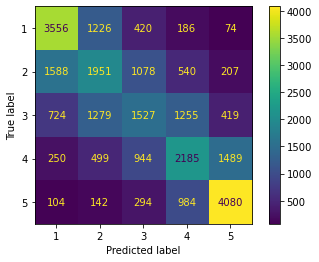

In [26]:
print("Accuracy Score: {}".format(accuracy_score(y_valid, pred)))
print("F1 Score: {}".format(f1_score(y_valid, pred, average = "macro")))
plot_confusion_matrix(model, X_valid_vect, y_valid)

# Predicting

In [28]:
test_df_tok = test_df.copy()
test_df_tok['review'] = preprocess(test_df_tok['review'])
test_df_tok['review'] = test_df_tok['review'].map(lambda x: " ".join(x))
test_df_tok

Processing Text
Removing Stop Words
Lemmatizing Tokens
Removing Non English Words


,review_id,review
0,1,"[great, danger, cool, motif, model, delivery, pack, less, okay, wear, clear, plastic, content]"
1,2,"[one, shade, fit, well]"
2,3,[comfortable]
3,4,"[fast, delivery, product, expiry, product, wrap, properly, damage, item]"
4,5,"[cute, like, play, glitter, well, browsing, phone, item, also, earlier, expect, thank, seller, may, buyer, come]"
...,...,...
60422,60423,"[product, order, ship, quickly, get, good, time, use, product, quality, value, money, save, time]"
60423,60424,"[opening, time, little, scar, fear, destroyed, eh, not, broken]"
60424,60425,"[product, quality, excellent, original, product, product, price, good, delivery, speed, good, response, good, seller, delivery]"
60425,60426,"[hold, really, well, also]"


In [33]:
test_df_pred = test_df_tok.copy()
X_test_vect = vectorizer.transform(test_df_pred['review'])
test_df_pred['rating'] = model.predict(X_test_vect)
test_df_pred

,review_id,review,rating
0,1,great danger cool motif model delivery pack less okay wear clear plastic content,3
1,2,one shade fit well,5
2,3,comfortable,5
3,4,fast delivery product expiry product wrap properly damage item,5
4,5,cute like play glitter well browsing phone item also earlier expect thank seller may buyer come,5
...,...,...,...
60422,60423,product order ship quickly get good time use product quality value money save time,3
60423,60424,opening time little scar fear destroyed eh not broken,3
60424,60425,product quality excellent original product product price good delivery speed good response good seller delivery,4
60425,60426,hold really well also,5


In [35]:
test_df_pred.drop("review", axis = 1).to_csv("./data/prediction.csv", index = False)